# Attacks on the proportional noise / flattening mechanism

This notebook looks at attacks on proprotional noise / flattening that assume that there are very specific data conditions and that the attacker knows it. The data conditions require a certain small number of extreme contributors. The data conditions are not realistic, so we do this to understand the absolute worst case.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.display import display
import sys
stdout = sys.stdout
import os
filePath = globals()['_dh'][0]
parDir = os.path.abspath(os.path.join(filePath, os.pardir))
print(parDir)
sys.path.append(parDir)

with open('data.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame.from_dict(data)
df['CR'] = pd.to_numeric(df['CR'])
df['CI'] = pd.to_numeric(df['CI'])
df['C'] = pd.to_numeric(df['C'])
df['Num Outliers'] = df['Num Outliers'].apply(str)
#df['Out Factor'] = df['Out Factor'].apply(str)

c:\paul\GitHub\attacker\diffixElmPaperAttacks


In [27]:

display(df.head())

,C,CI,CR,Num Outliers,Out Factor,SD,Unknown Vals,claims,setting,thresh
0,0.68,0.36,1.0,"[[1, 2], [2, 3]]",1.2,1.5,2,100000,min,1.0
1,0.68,0.36,1.0,"[[1, 2], [2, 3]]",1.2,1.5,2,100000,max,1.0
2,0.68,0.36,1.0,"[[1, 2], [2, 3]]",1.2,1.5,2,100000,max+1,1.0
3,0.68,0.36,1.0,"[[1, 2], [2, 3]]",1.5,1.5,2,100000,min,1.0
4,0.69,0.37,1.0,"[[1, 2], [2, 3]]",1.5,1.5,2,100000,max,1.0


In [28]:
df.describe()

,C,CI,CR,Out Factor,SD,Unknown Vals,claims,thresh
count,626.000000,626.000000,6.260000e+02,626.000000,626.000000,626.000000,626.000000,626.000000
mean,0.582284,0.453169,6.484933e-01,3.909265,2.196086,6.940895,64865.402556,1.241782
std,0.335421,0.380962,4.762932e-01,3.305072,0.601322,6.979606,47607.541548,0.353570
min,0.000000,-1.000000,1.000000e-08,1.200000,1.500000,2.000000,0.000000,1.000000
25%,0.330000,0.160000,5.350000e-04,1.500000,1.500000,2.000000,100.000000,1.000000
50%,0.640000,0.270000,1.000000e+00,2.000000,2.250000,5.000000,100000.000000,1.000000
75%,0.980000,0.960000,1.000000e+00,5.000000,3.000000,5.000000,100000.000000,1.545057
max,1.050000,1.050000,1.000000e+00,10.000000,3.000000,20.000000,100000.000000,2.924360


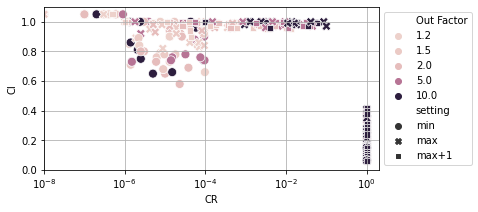

In [29]:
plt.figure(figsize=(6, 3))
ax = sns.scatterplot(data=df, x="CR", y="CI",hue='Out Factor',style='setting',s=80)
ax.set(xscale='log')
ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0), ncol=1)
plt.xlim(0.00000001,2)
plt.ylim(0,1.1)
plt.grid()

Above is all the data. At a glance, we can see that much of the data has CR > 10e-4 and CI > 0.95. In other words, in our designated risk area. Also much of this data is for higher "out factor" (the multiplicative factor by which the extreme values are greater than the average non-extreme values), but probably not all.

Note that CI values above 1.0 mean that there aren't enough datapoints to plot the measured CI.

Setting of 'min' means that the number of extreme contributors is equal to the minimum outlier_range size, and so all of the extreme contributors are in the outlier_group and are flattened. Setting of 'max' means that the number of extreme contributors is equal to the maximum outlier_range size, and so sometimes one or more of the extreme contributors is in the top_group and are not flattened, but rather contribute to the noise amount. Setting of 'max+1' is one additional extreme contributor, so there is always at least one extreme contributor in the top_group.

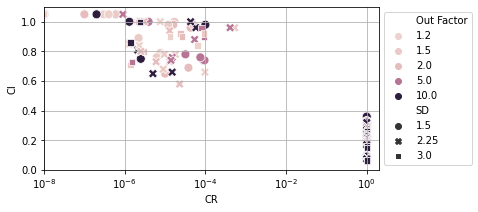

In [30]:
dfMin = df.query('setting == "min"')
plt.figure(figsize=(6, 3))
ax = sns.scatterplot(data=dfMin, x="CR", y="CI",hue='Out Factor',style='SD',s=80)
ax.set(xscale='log')
ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0), ncol=1)
plt.xlim(0.00000001,2)
plt.ylim(0,1.1)
plt.grid()

Above we are looking at only the attacks with the 'min' setting. Here we can see that we are almost completely out of the risk area. Not sure what is going on with the two datapoints within the risk area (for out factor of 1.5 and 5.0). TODO: check those in detail. In any event, assuming no bugs, these results show that the defense is effective in dealing with individual extreme contributors.

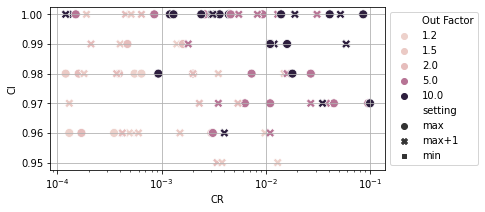

In [38]:
# Select only the data points in the designated risk area
dfRisk = df.query('CR > 0.0001 and CI > 0.5')
plt.figure(figsize=(6, 3))
ax = sns.scatterplot(data=dfRisk, x="CR", y="CI",hue='Out Factor',style='setting',s=80)
ax.set(xscale='log')
ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0), ncol=1)
#plt.xlim(0.00000001,2)
#plt.ylim(0,1.1)
plt.grid()

The above focuses only on those attacks in the risk area. (Unfortunately I rounded CI to two digits.) Here we certainly see that the worst cases are where the few extreme contributors are substantially more extreme than the average non-extreme contributors. A CR greater than 1/100 where Out Factor <= 2.0 is rare.

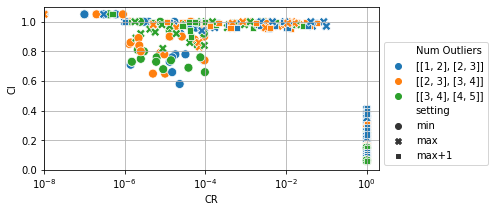

In [36]:
plt.figure(figsize=(6, 3))
ax = sns.scatterplot(data=df, x="CR", y="CI",hue='Num Outliers',style='setting',s=80)
ax.set(xscale='log')
ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0), ncol=1)
plt.xlim(0.00000001,2)
plt.ylim(0,1.1)
plt.grid()

The above graph suggests that the setting of the outlier parameters per se doesn't matter, but rather how many outliers there are relative to the outlier parameter settings. 

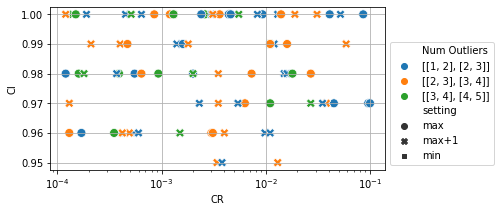

In [40]:
plt.figure(figsize=(6, 3))
ax = sns.scatterplot(data=dfRisk, x="CR", y="CI",hue='Num Outliers',style='setting',s=80)
ax.set(xscale='log')
ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0), ncol=1)
plt.grid()

The above graph, focusing on the at-risk attacks, supports the conclusion that the outlier settings per se don't matter when the data conditions are pessimal relative to the outlier setting.

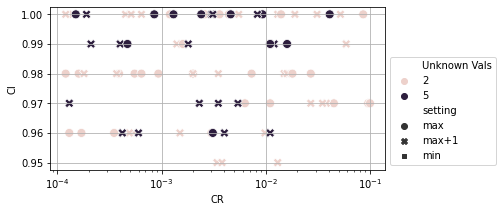

In [42]:
plt.figure(figsize=(6, 3))
ax = sns.scatterplot(data=dfRisk, x="CR", y="CI",hue='Unknown Vals',style='setting',s=80)
ax.set(xscale='log')
ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0), ncol=1)
plt.grid()

Here we are looking at the number of distinct unknown values. We still need to run the numbers for 20 unknown values, but so far it doesn't appear to matter that much.